# 기본 설정

In [2]:
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
train= pd.read_csv('/content/gdrive/MyDrive/ML MODELING/공기압축기 이상판단/dataset/train_data.csv')
test= pd.read_csv('/content/gdrive/MyDrive/ML MODELING/공기압축기 이상판단/dataset/test_data.csv')
sam= pd.read_csv('/content/gdrive/MyDrive/ML MODELING/공기압축기 이상판단/dataset/answer_sample.csv')


Mounted at /content/gdrive


# 단변량분석

In [4]:
train.loc[train['type'] == 1,'HP'] = 20
train.loc[train['type'] == 2,'HP'] = 10
train.loc[train['type'] == 3,'HP'] = 50
train.loc[train['type'].isin([0,4,5,6,7]),'HP'] = 30

test.loc[test['type'] == 1,'HP'] = 20
test.loc[test['type'] == 2,'HP'] = 10
test.loc[test['type'] == 3,'HP'] = 50
test.loc[test['type'].isin([0,4,5,6,7]),'HP'] = 30

In [5]:
type0_train = train[train['HP'] == 30]
type1_train = train[train['HP'] == 20]
type2_train = train[train['HP'] == 10]
type3_train = train[train['HP'] == 50]

type0_test = test[test['HP'] == 30]
type1_test = test[test['HP'] == 20]
type2_test = test[test['HP'] == 10]
type3_test = test[test['HP'] == 50]

In [10]:
df = pd.concat([train , test], axis = 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9852 entries, 0 to 7388
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   air_inflow     9852 non-null   float64
 1   air_end_temp   9852 non-null   float64
 2   out_pressure   9852 non-null   float64
 3   motor_current  9852 non-null   float64
 4   motor_rpm      9852 non-null   float64
 5   motor_temp     9852 non-null   float64
 6   motor_vibe     9852 non-null   float64
 7   type           9852 non-null   int64  
 8   HP             9852 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 769.7 KB


In [12]:
df.head(3)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,30.0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,30.0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,30.0


In [13]:
df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000
mean,2.109557,49.032336,0.699880,27.436130,2373.509237,65.770394,3.372385,2.957369,28.014616
std,1.173689,8.695520,0.004657,13.327023,687.735877,7.755034,0.966673,2.229774,10.963001
min,0.330000,32.030000,0.490000,5.340000,1200.000000,50.360000,1.970000,0.000000,10.000000
25%,1.280000,41.525000,0.700000,17.170000,1776.000000,59.120000,2.890000,1.000000,20.000000
50%,1.940000,48.805000,0.700000,26.035000,2356.000000,65.575000,3.260000,3.000000,30.000000
75%,2.780000,56.502500,0.700000,35.950000,2972.000000,72.420000,3.730000,5.000000,30.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,21.870000,7.000000,50.000000


In [14]:
train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369,28.014616
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113,10.964670
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000,10.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000,20.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000,30.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000,30.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000,50.000000


In [15]:
test.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369,28.014616
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811,10.963186
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000,10.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000,20.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000,30.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000,30.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000,50.000000


In [16]:
print('*** train ***')
print(train['out_pressure'].value_counts())
print('*** test ***')
print(test['out_pressure'].value_counts())

*** train ***
0.7    2463
Name: out_pressure, dtype: int64
*** test ***
0.70    7382
0.60       2
0.50       2
0.49       2
0.54       1
Name: out_pressure, dtype: int64


In [52]:
id =test[test['out_pressure']!= 0.7].index

train 데이터는 모두 정상 데이터 > out_pressure 0.7이 아니면 이상 데이터

0    0.175396
1    0.149817
2    0.148599
3    0.124239
4    0.124239
5    0.101096
6    0.101096
7    0.075518
Name: type, dtype: float64


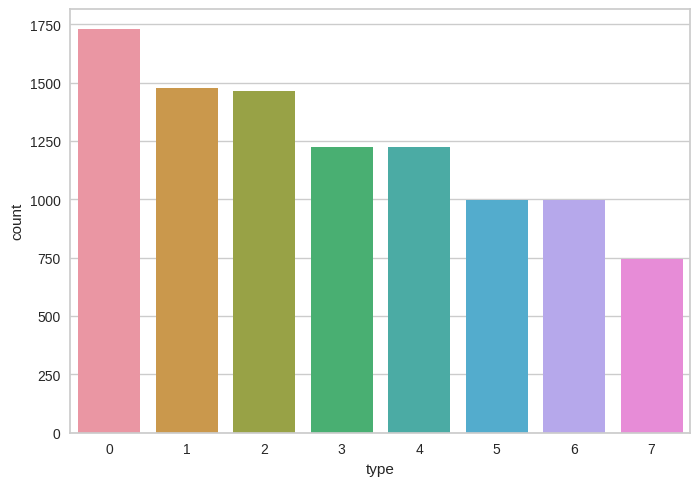

In [17]:
# type
print(df['type'].value_counts()/df.shape[0])
sns.countplot(x = df['type'])
plt.show()

30.0    0.577345
20.0    0.149817
10.0    0.148599
50.0    0.124239
Name: HP, dtype: float64


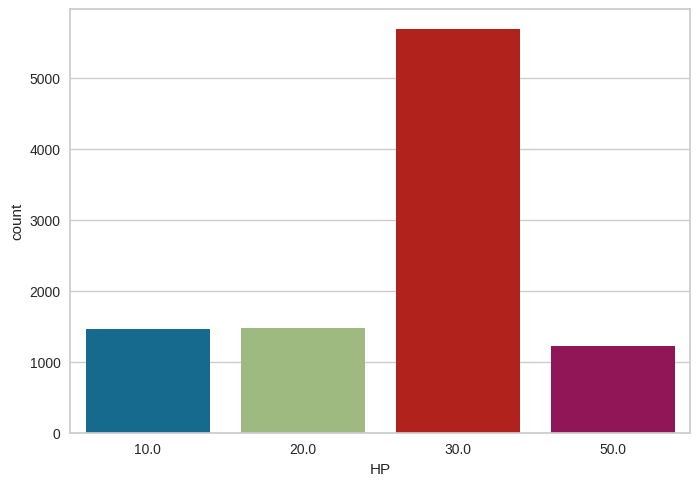

In [18]:
# HP
print(df['HP'].value_counts()/df.shape[0])
sns.countplot(x = df['HP'])
plt.show()

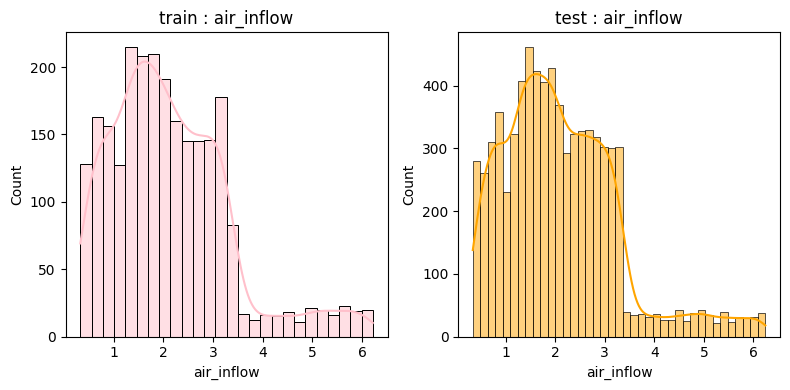

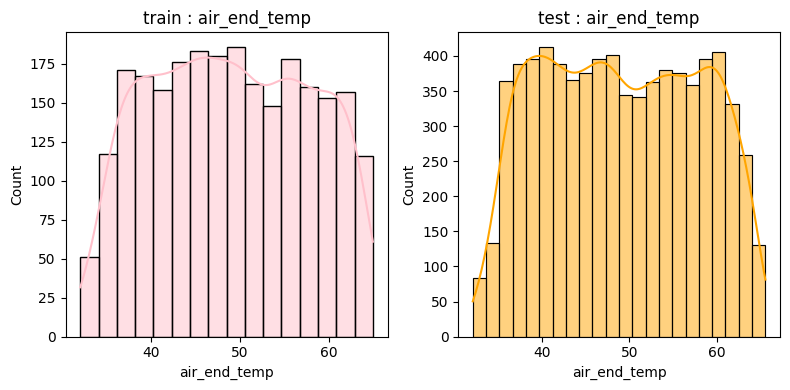

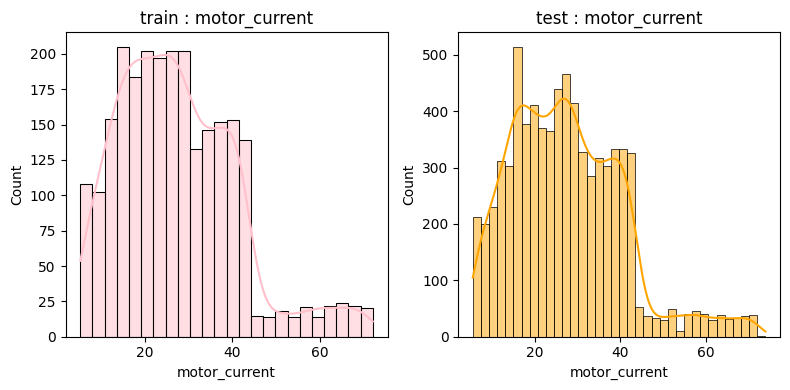

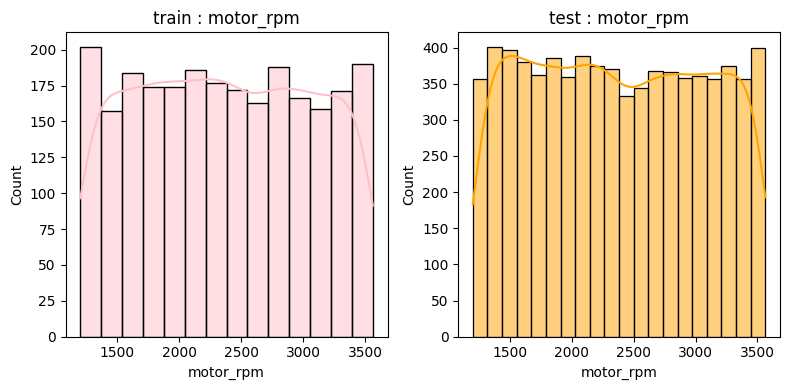

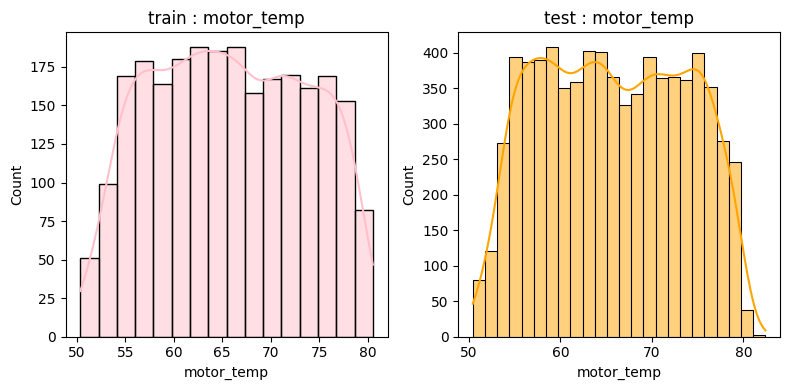

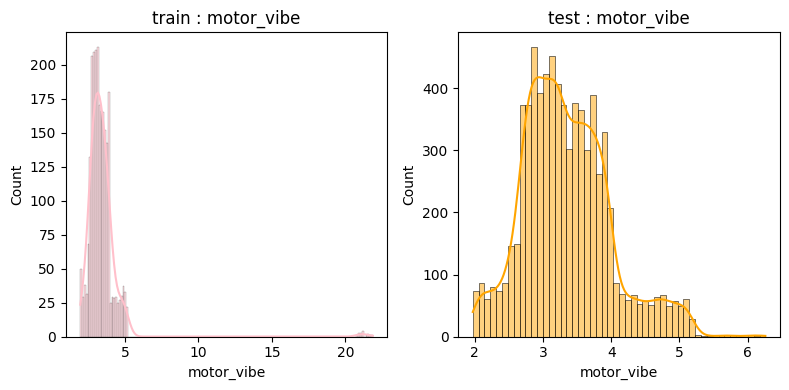

In [6]:
col = ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']

for i, column in enumerate(col, start=1):
    plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    sns.histplot(data = train, x = column, color = 'pink', kde=True)
    plt.title('train : ' + column)
    plt.subplot(1,2,2)
    sns.histplot(data = test, x = column, color = 'orange', kde=True)
    plt.title('test : ' + column)
    plt.tight_layout()
    plt.show()

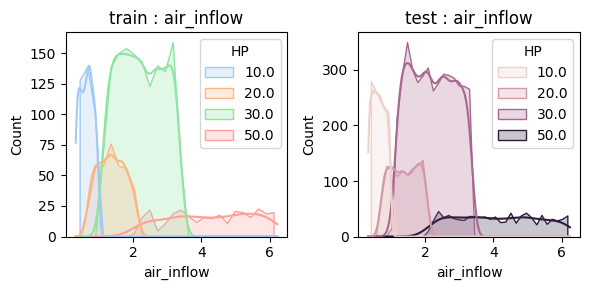

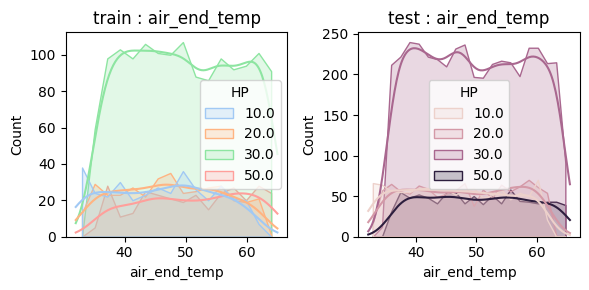

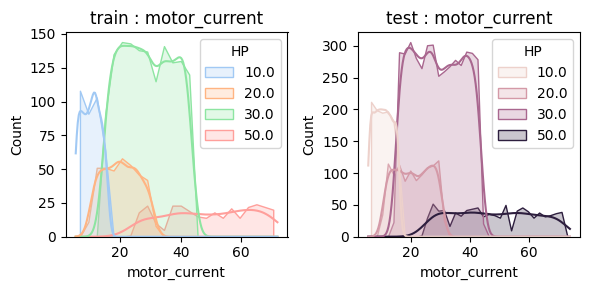

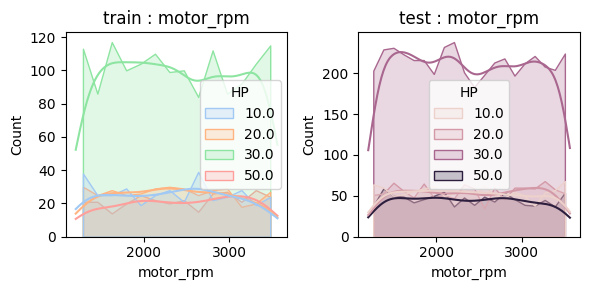

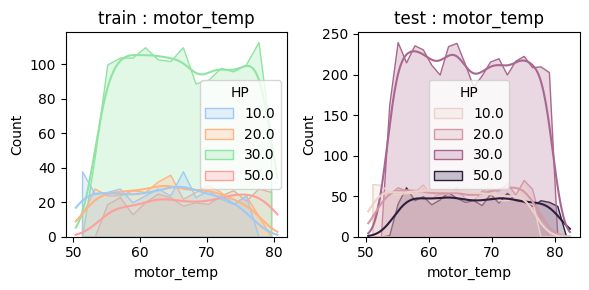

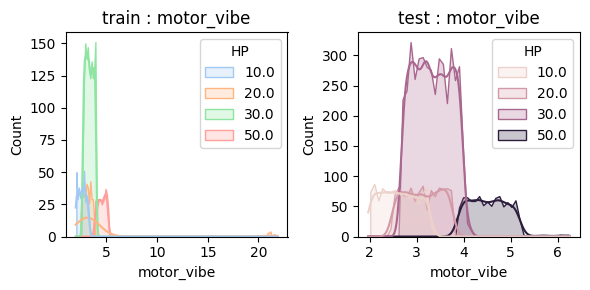

In [19]:
col = ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']


for i, column in enumerate(col, start=1):
    plt.figure(figsize=(6, 3))
    plt.subplot(1,2,1)
    sns.histplot(data = train, x = column, hue = 'HP', element = 'poly', palette= 'pastel', kde=True)
    plt.title('train : ' + column)
    plt.subplot(1,2,2)
    sns.histplot(data = test, x = column, hue = 'HP',  element = 'poly', color = 'set2', kde=True)
    plt.title('test : ' + column)
    plt.tight_layout()
    plt.show()

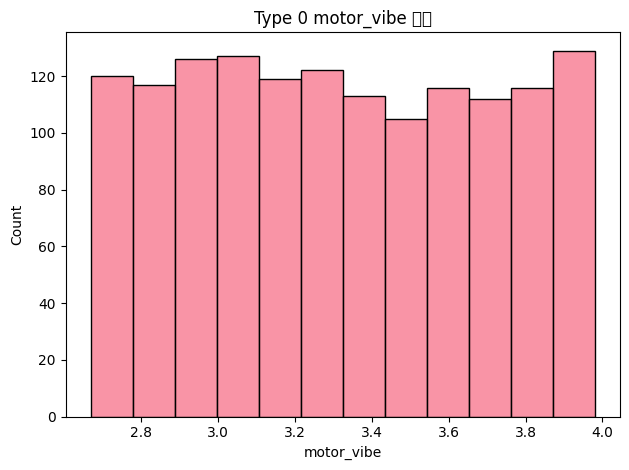

----------------------------------------------------------------------


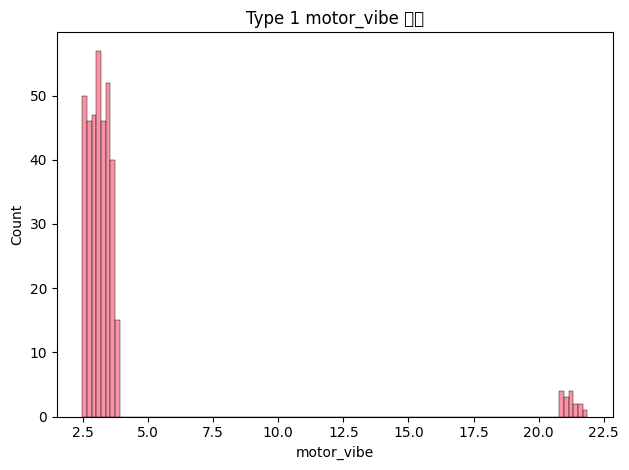

----------------------------------------------------------------------


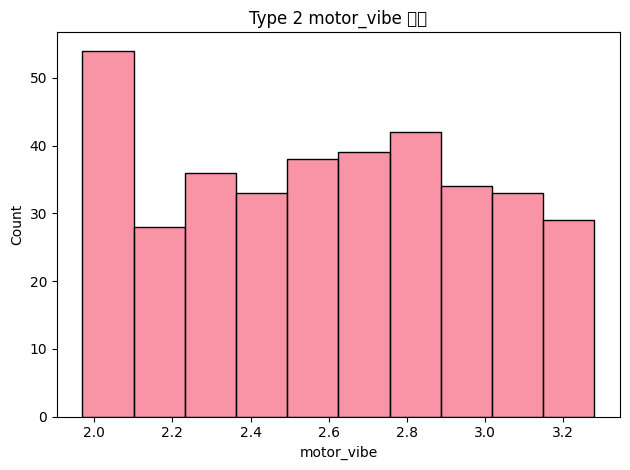

----------------------------------------------------------------------


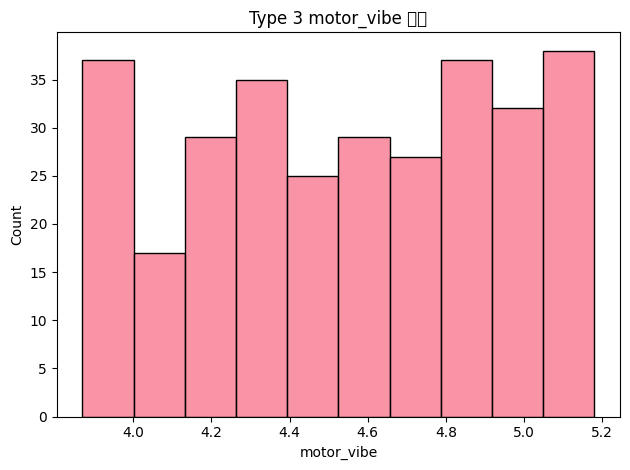

----------------------------------------------------------------------


In [ ]:
type_train = [type0_train, type1_train, type2_train, type3_train]

for i, type_list in enumerate(type_train):
    sns.histplot(type_list['motor_vibe'])
    plt.title(f'Type {i} motor_vibe 분포')
    plt.tight_layout()
    plt.show()

    print('-' * 70)

Type 1 'motor_vibe' 변수에 이상치 존재 > 20이상 이상치

In [11]:
train_in = train[train['motor_vibe'] < 20]

In [12]:
len(train[train['motor_vibe'] > 20])

16

16개 row 삭제

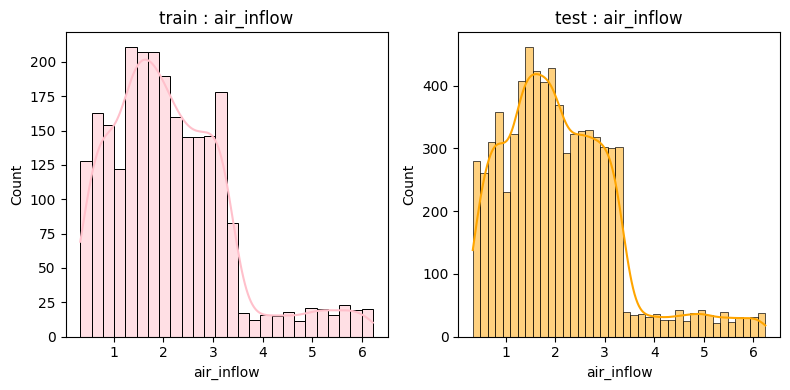

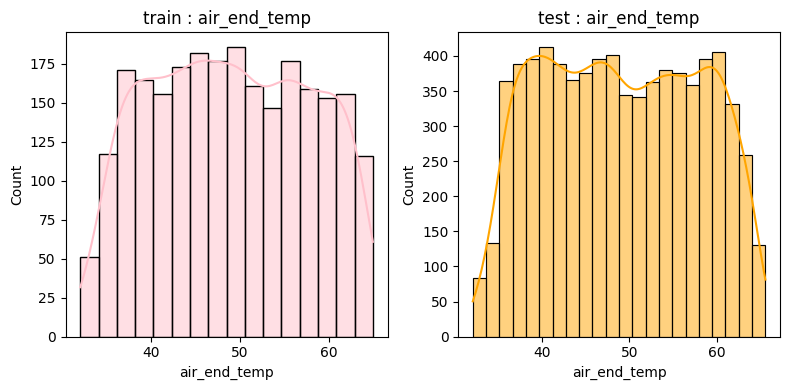

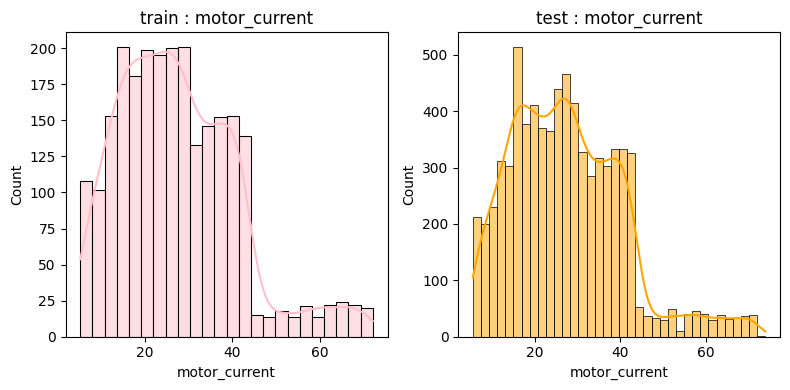

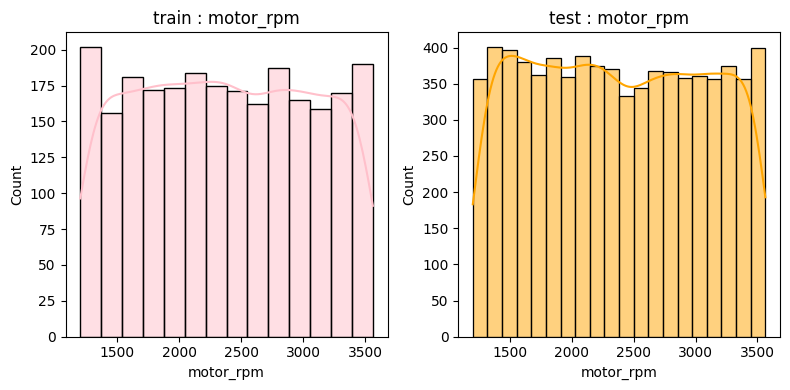

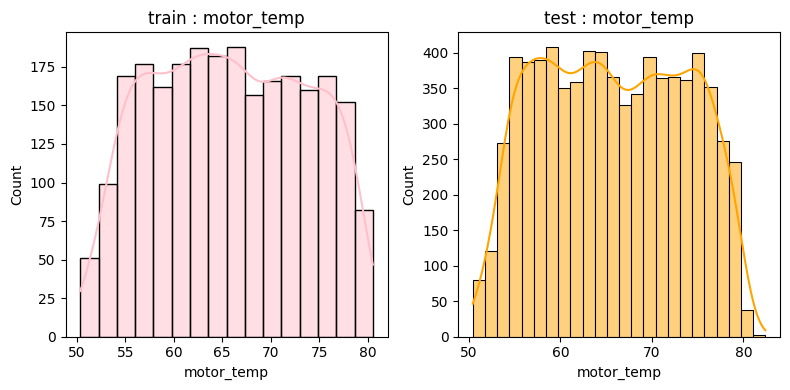

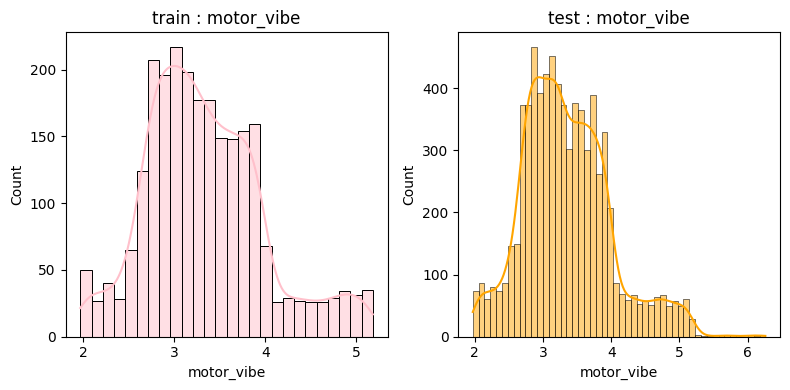

In [13]:
col = ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']

for i, column in enumerate(col, start=1):
    plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    sns.histplot(data = train_in, x = column, color = 'pink', kde=True)
    plt.title('train : ' + column)
    plt.subplot(1,2,2)
    sns.histplot(data = test, x = column, color = 'orange', kde=True)
    plt.title('test : ' + column)
    plt.tight_layout()
    plt.show()

In [14]:
type0_train = train_in[train_in['HP'] == 30]
type1_train = train_in[train_in['HP'] == 20]
type2_train = train_in[train_in['HP'] == 10]
type3_train = train_in[train_in['HP'] == 50]


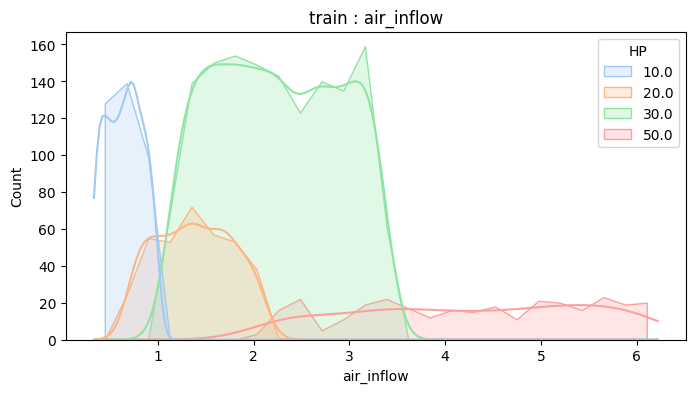

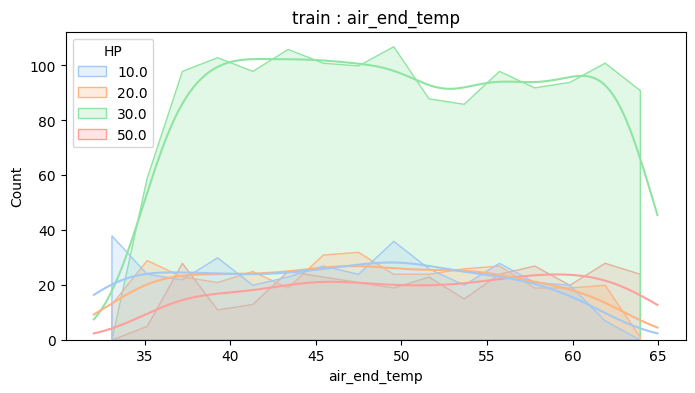

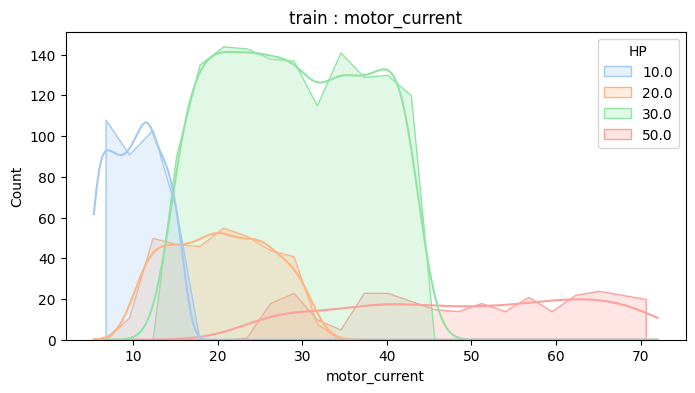

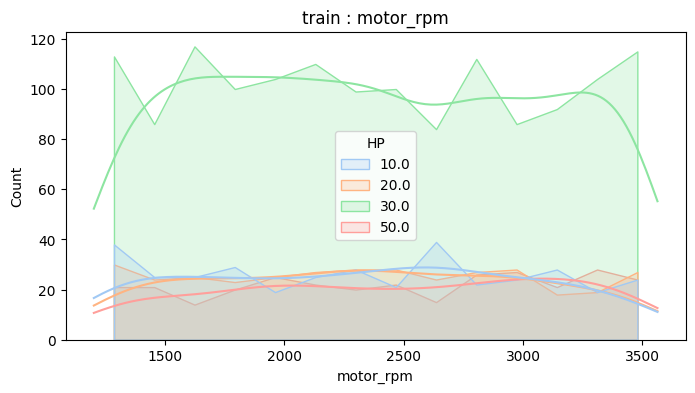

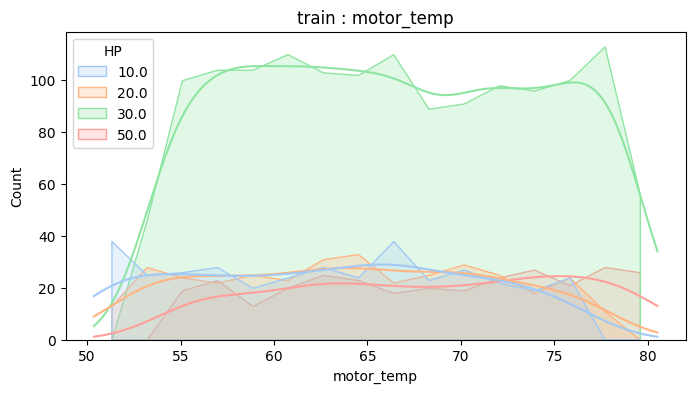

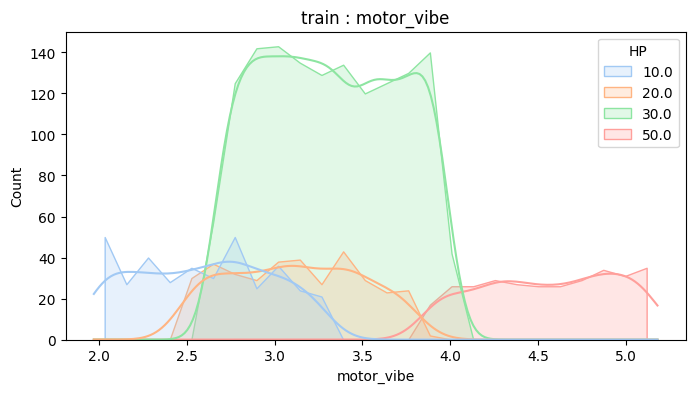

In [16]:
col = ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']


for i, column in enumerate(col, start=1):
    plt.figure(figsize=(8, 4))
    sns.histplot(data = train_in, x = column, hue = 'HP', element = 'poly', palette= 'pastel', kde=True)
    plt.title('train : ' + column)
    plt.show()

# 이변량분석

In [50]:
def high_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot= True)
    plt.show()
    high = []
    for i in range(len(correlation.columns)):
        for j in range(i):
            if abs(correlation.iloc[i, j]) >= 0.8:
                high.append((correlation.columns[i], correlation.columns[j]))

    print( "0.8 이상의 상관 계수를 가진 변수 쌍:")
    for pair in high:
        print(pair)



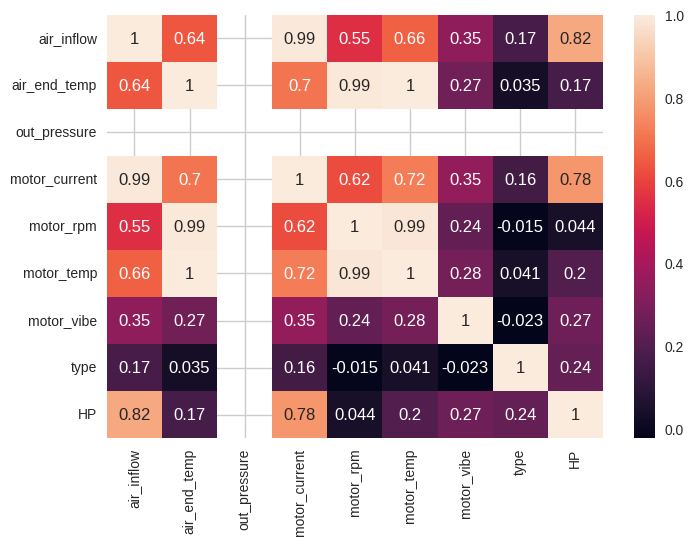

0.8 이상의 상관 계수를 가진 변수 쌍:
('motor_current', 'air_inflow')
('motor_rpm', 'air_end_temp')
('motor_temp', 'air_end_temp')
('motor_temp', 'motor_rpm')
('HP', 'air_inflow')


None

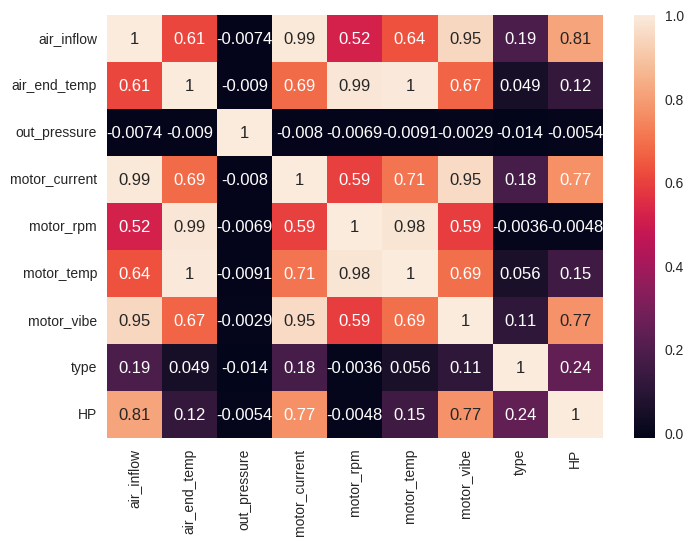

0.8 이상의 상관 계수를 가진 변수 쌍:
('motor_current', 'air_inflow')
('motor_rpm', 'air_end_temp')
('motor_temp', 'air_end_temp')
('motor_temp', 'motor_rpm')
('motor_vibe', 'air_inflow')
('motor_vibe', 'motor_current')
('HP', 'air_inflow')


None

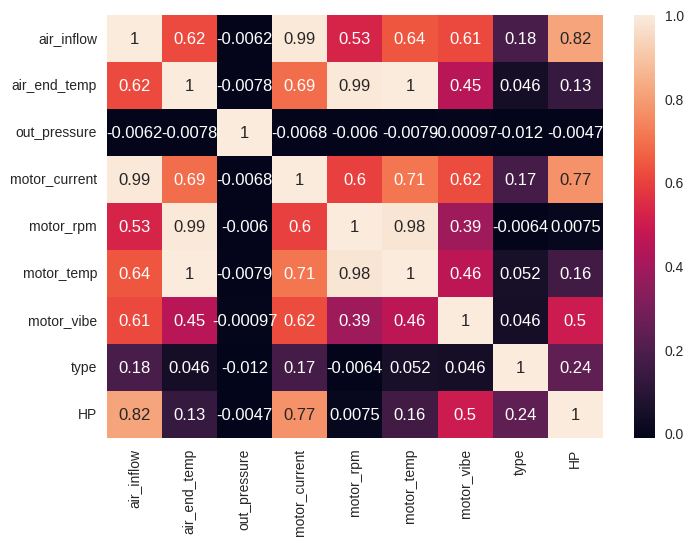

0.8 이상의 상관 계수를 가진 변수 쌍:
('motor_current', 'air_inflow')
('motor_rpm', 'air_end_temp')
('motor_temp', 'air_end_temp')
('motor_temp', 'motor_rpm')
('HP', 'air_inflow')


None

In [51]:
display(high_corr(train))
display(high_corr(test))
display(high_corr(df))

In [24]:
train.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.636467,NaN,0.994585,0.549101,0.659138,0.347755,0.169851,0.823294
air_end_temp,0.636467,1.000000,NaN,0.703042,0.990302,0.999506,0.273699,0.034830,0.165039
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.994585,0.703042,NaN,1.000000,0.619536,0.723685,0.353014,0.160190,0.780123
motor_rpm,0.549101,0.990302,NaN,0.619536,1.000000,0.986419,0.237544,-0.015008,0.044495
motor_temp,0.659138,0.999506,NaN,0.723685,0.986419,1.000000,0.282746,0.040964,0.195220
motor_vibe,0.347755,0.273699,NaN,0.353014,0.237544,0.282746,1.000000,-0.023323,0.267408
type,0.169851,0.034830,NaN,0.160190,-0.015008,0.040964,-0.023323,1.000000,0.240715
HP,0.823294,0.165039,NaN,0.780123,0.044495,0.195220,0.267408,0.240715,1.000000


In [25]:
test.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.610628,-0.007383,0.991016,0.518147,0.635348,0.946012,0.186551,0.814605
air_end_temp,0.610628,1.000000,-0.008984,0.685231,0.987989,0.995482,0.670457,0.049235,0.122494
out_pressure,-0.007383,-0.008984,1.000000,-0.007960,-0.006895,-0.009131,-0.002926,-0.013889,-0.005379
motor_current,0.991016,0.685231,-0.007960,1.000000,0.594143,0.706455,0.954707,0.175325,0.768435
motor_rpm,0.518147,0.987989,-0.006895,0.594143,1.000000,0.981809,0.588670,-0.003585,-0.004813
motor_temp,0.635348,0.995482,-0.009131,0.706455,0.981809,1.000000,0.691989,0.055805,0.152482
motor_vibe,0.946012,0.670457,-0.002926,0.954707,0.588670,0.691989,1.000000,0.111714,0.773935
type,0.186551,0.049235,-0.013889,0.175325,-0.003585,0.055805,0.111714,1.000000,0.240715
HP,0.814605,0.122494,-0.005379,0.768435,-0.004813,0.152482,0.773935,0.240715,1.000000


In [26]:
df.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.617172,-0.006200,0.991922,0.525991,0.641402,0.614548,0.182248,0.816712
air_end_temp,0.617172,1.000000,-0.007801,0.689747,0.988567,0.996494,0.446556,0.045622,0.133164
out_pressure,-0.006200,-0.007801,1.000000,-0.006810,-0.005983,-0.007897,-0.000974,-0.012027,-0.004658
motor_current,0.991922,0.689747,-0.006810,1.000000,0.600577,0.710844,0.620809,0.171450,0.771360
motor_rpm,0.525991,0.988567,-0.005983,0.600577,1.000000,0.982963,0.391006,-0.006441,0.007515
motor_temp,0.641402,0.996494,-0.007897,0.710844,0.982963,1.000000,0.461092,0.052074,0.163222
motor_vibe,0.614548,0.446556,-0.000974,0.620809,0.391006,0.461092,1.000000,0.046327,0.495812
type,0.182248,0.045622,-0.012027,0.171450,-0.006441,0.052074,0.046327,1.000000,0.240715
HP,0.816712,0.133164,-0.004658,0.771360,0.007515,0.163222,0.495812,0.240715,1.000000


In [27]:
train_in.corr()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.636609,NaN,0.994595,0.548679,0.659363,0.959036,0.166956,0.823014
air_end_temp,0.636609,1.000000,NaN,0.703074,0.990281,0.999505,0.697023,0.033980,0.164828
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.994595,0.703074,NaN,1.000000,0.619053,0.723792,0.962504,0.157541,0.779911
motor_rpm,0.548679,0.990281,NaN,0.619053,1.000000,0.986383,0.623084,-0.016546,0.043452
motor_temp,0.659363,0.999505,NaN,0.723792,0.986383,1.000000,0.718678,0.040154,0.195131
motor_vibe,0.959036,0.697023,NaN,0.962504,0.623084,0.718678,1.000000,0.101045,0.783750
type,0.166956,0.033980,NaN,0.157541,-0.016546,0.040154,0.101045,1.000000,0.237532
HP,0.823014,0.164828,NaN,0.779911,0.043452,0.195131,0.783750,0.237532,1.000000


In [30]:
display(type0_train.corr())
display(type1_train.corr())
display(type2_train.corr())
display(type3_train.corr())

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.999990,NaN,0.999990,0.999990,0.999990,0.999965,-0.036988,NaN
air_end_temp,0.999990,1.000000,NaN,1.000000,1.000000,1.000000,0.999973,-0.037029,NaN
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.999990,1.000000,NaN,1.000000,1.000000,1.000000,0.999972,-0.037042,NaN
motor_rpm,0.999990,1.000000,NaN,1.000000,1.000000,1.000000,0.999973,-0.037037,NaN
motor_temp,0.999990,1.000000,NaN,1.000000,1.000000,1.000000,0.999972,-0.037043,NaN
motor_vibe,0.999965,0.999973,NaN,0.999972,0.999973,0.999972,1.000000,-0.036626,NaN
type,-0.036988,-0.037029,NaN,-0.037042,-0.037037,-0.037043,-0.036626,1.000000,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.999774,NaN,0.999854,0.998747,0.999820,0.999400,NaN,NaN
air_end_temp,0.999774,1.000000,NaN,0.999947,0.999418,0.999991,0.999065,NaN,NaN
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.999854,0.999947,NaN,1.000000,0.999421,0.999930,0.998947,NaN,NaN
motor_rpm,0.998747,0.999418,NaN,0.999421,1.000000,0.999264,0.997031,NaN,NaN
motor_temp,0.999820,0.999991,NaN,0.999930,0.999264,1.000000,0.999237,NaN,NaN
motor_vibe,0.999400,0.999065,NaN,0.998947,0.997031,0.999237,1.000000,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.999882,NaN,0.999879,0.999882,0.999881,0.999827,NaN,NaN
air_end_temp,0.999882,1.000000,NaN,0.999999,1.000000,1.000000,0.999974,NaN,NaN
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.999879,0.999999,NaN,1.000000,1.000000,0.999999,0.999972,NaN,NaN
motor_rpm,0.999882,1.000000,NaN,1.000000,1.000000,1.000000,0.999974,NaN,NaN
motor_temp,0.999881,1.000000,NaN,0.999999,1.000000,1.000000,0.999973,NaN,NaN
motor_vibe,0.999827,0.999974,NaN,0.999972,0.999974,0.999973,1.000000,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,HP
air_inflow,1.000000,0.999997,NaN,0.999781,0.999997,0.999997,0.999972,NaN,NaN
air_end_temp,0.999997,1.000000,NaN,0.999782,1.000000,1.000000,0.999974,NaN,NaN
out_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_current,0.999781,0.999782,NaN,1.000000,0.999782,0.999781,0.999733,NaN,NaN
motor_rpm,0.999997,1.000000,NaN,0.999782,1.000000,1.000000,0.999974,NaN,NaN
motor_temp,0.999997,1.000000,NaN,0.999781,1.000000,1.000000,0.999973,NaN,NaN
motor_vibe,0.999972,0.999974,NaN,0.999733,0.999974,0.999973,1.000000,NaN,NaN
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def type_corr(data):
    type0_df = data[data['HP'] == 30]
    type1_df = data[data['HP'] == 20]
    type2_df = data[data['HP'] == 10]
    type3_df = data[data['HP'] == 50]

    type_df = [type0_df, type1_df, type2_df, type3_df]

    plt.figure(figsize=(12, 8))
    for i, type_list in enumerate(type_df, start=1):
        plt.subplot(2, 2, i)
        sns.heatmap(type_list.corr(), annot=True)
        plt.title(f'Correlation Heatmap for HP Type {i}')

    plt.suptitle('Correlation Heatmaps for Different HP Types', fontsize=16)
    plt.tight_layout()
    plt.show()


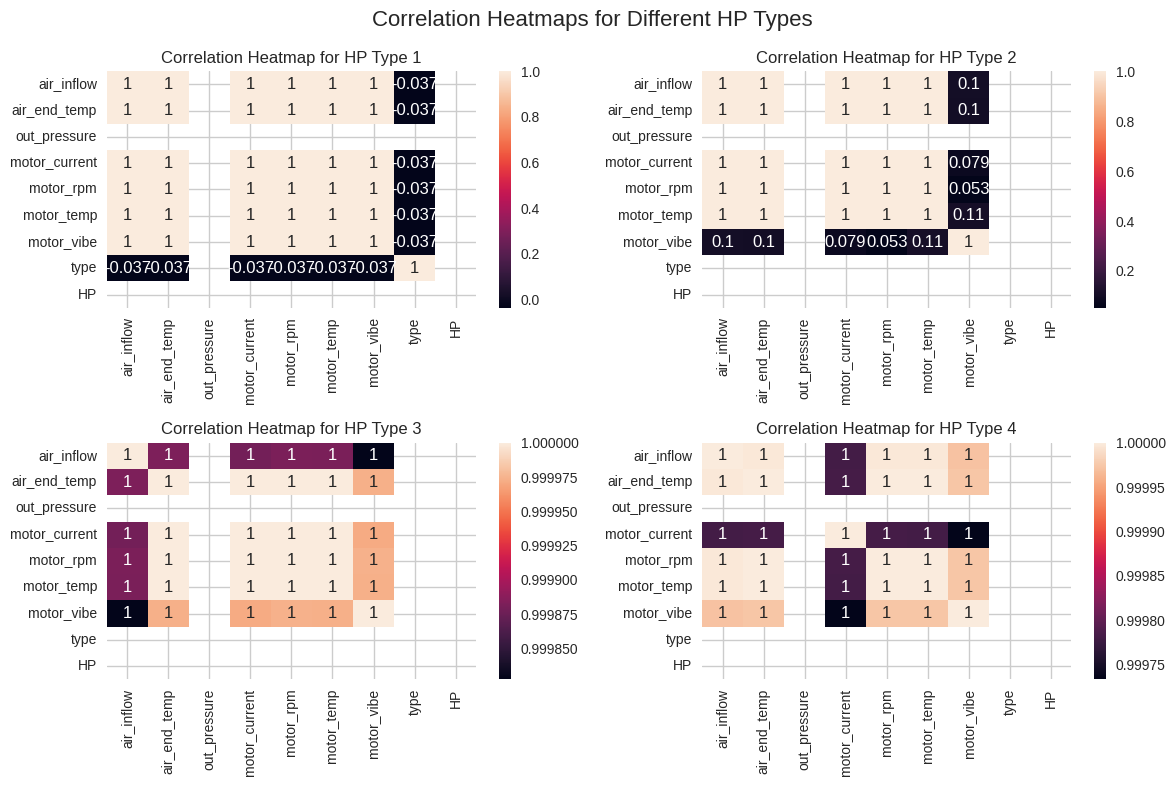

In [ ]:
type_corr(train)

In [47]:
type_df = [type0_train, type1_train, type2_train, type3_train]
high = []

type_df = [type0_train, type1_train, type2_train, type3_train]
for idx, data in enumerate(type_df):
    correlation = data.corr()
    for i in range(len(correlation.columns)):
        for j in range(i):
            if round(abs(correlation.iloc[i, j]),2) < 1:
                high.append((correlation.columns[i], correlation.columns[j]))

    if len(high) != 0:
        print(f"{idx} type에서 완전한 선형관계 가지지 않는 변수 쌍:")
        for pair in high:
            print(pair)
    else:
        print(f"{idx} type에서는 완전한 선형관계를 보입니다.")

    high = []

0 type에서 완전한 선형관계 가지지 않는 변수 쌍:
('type', 'air_inflow')
('type', 'air_end_temp')
('type', 'motor_current')
('type', 'motor_rpm')
('type', 'motor_temp')
('type', 'motor_vibe')
1 type에서는 완전한 선형관계를 보입니다.
2 type에서는 완전한 선형관계를 보입니다.
3 type에서는 완전한 선형관계를 보입니다.


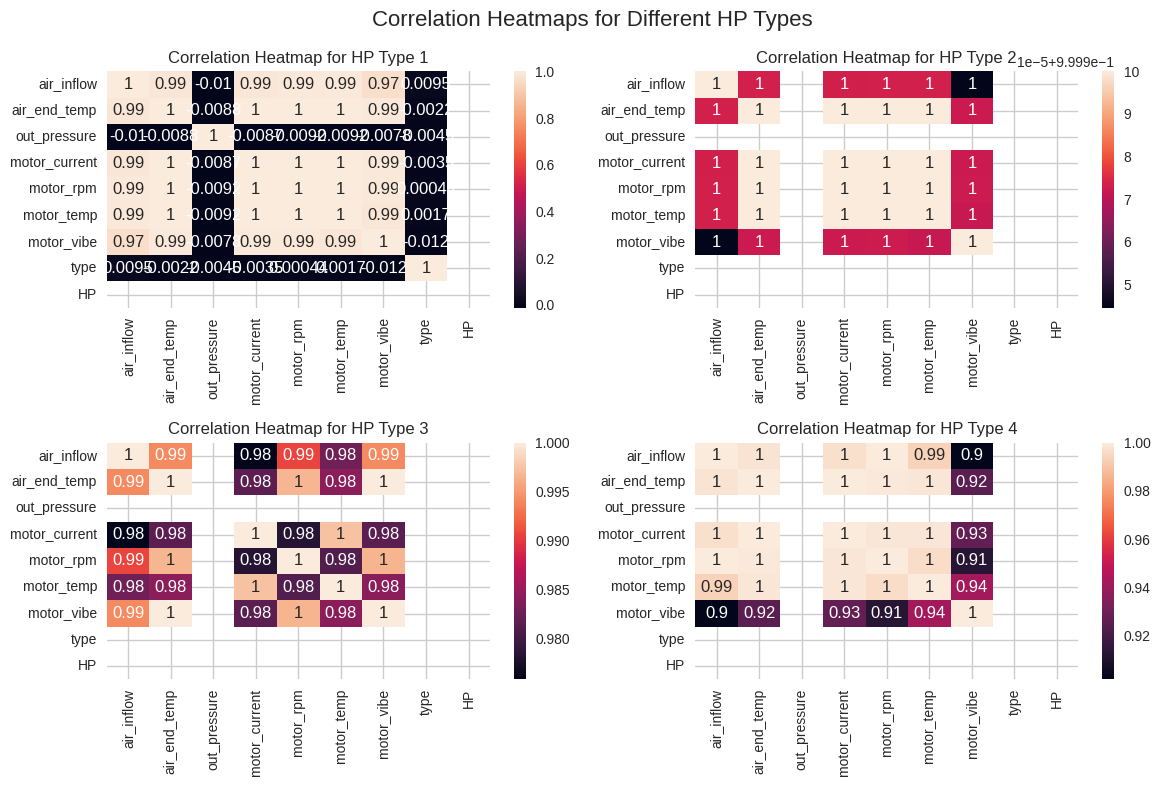

In [ ]:
type_corr(test)

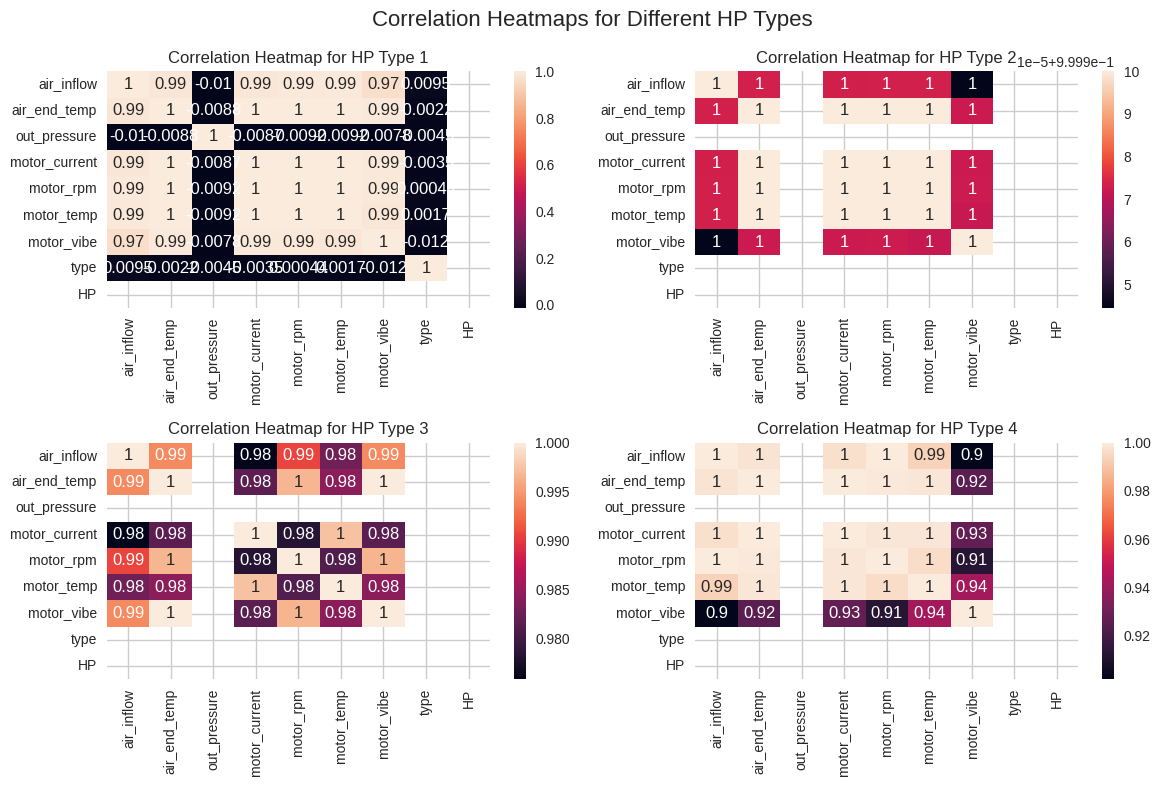

In [ ]:
type_corr(test)

In [48]:
type_df = [type0_test, type1_test, type2_test, type3_test]
high = []  # 변수 쌍을 저장할 리스트를 초기화

for idx, data in enumerate(type_df):
    correlation = data.corr()
    for i in range(len(correlation.columns)):
        for j in range(i):
            if round(abs(correlation.iloc[i, j]),2) < 0.99:
                high.append((correlation.columns[i], correlation.columns[j]))

    if len(high) != 0:
        print(f"{idx} type에서 완전한 선형관계를 가지지 않는 변수 쌍:")
        for pair in high:
            print(pair)
    else:
        print(f"{idx} type에서는  완전한 선형관계를 보입니다.")

    high = []

0 type에서 완전한 선형관계를 가지지 않는 변수 쌍:
('out_pressure', 'air_inflow')
('out_pressure', 'air_end_temp')
('motor_current', 'out_pressure')
('motor_rpm', 'out_pressure')
('motor_temp', 'out_pressure')
('motor_vibe', 'air_inflow')
('motor_vibe', 'out_pressure')
('type', 'air_inflow')
('type', 'air_end_temp')
('type', 'out_pressure')
('type', 'motor_current')
('type', 'motor_rpm')
('type', 'motor_temp')
('type', 'motor_vibe')
1 type에서는  완전한 선형관계를 보입니다.
2 type에서 완전한 선형관계를 가지지 않는 변수 쌍:
('motor_current', 'air_inflow')
('motor_current', 'air_end_temp')
('motor_rpm', 'motor_current')
('motor_temp', 'air_inflow')
('motor_temp', 'air_end_temp')
('motor_temp', 'motor_rpm')
('motor_vibe', 'motor_current')
('motor_vibe', 'motor_temp')
3 type에서 완전한 선형관계를 가지지 않는 변수 쌍:
('motor_vibe', 'air_inflow')
('motor_vibe', 'air_end_temp')
('motor_vibe', 'motor_current')
('motor_vibe', 'motor_rpm')
('motor_vibe', 'motor_temp')
